In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.neural_network import MLPClassifier
from feat_extractor import autoencoder


In [3]:
ae = autoencoder ()

In [4]:
scores_all = []
cms = []

for name in ae.sname:
    feat = np.array(pd.read_csv ("/Users/robert/src/MachineLearning/processed_result/features/train/feat_loso" + name + ".csv"))
    feat_test = np.array(pd.read_csv ("/Users/robert/src/MachineLearning/processed_result/features/test/feat_loso" + name + ".csv"))
    
    y = feat[:,-1]
    x = feat[:,:-1]
    x = StandardScaler().fit_transform(x)
    
    y_test = feat_test[:,-1]
    x_test = feat_test[:,:-1]
    x_test = StandardScaler().fit_transform(x_test)
    
    print("Training ...")
    clf = MLPClassifier(activation = 'tanh', hidden_layer_sizes=10,learning_rate_init=0.1, max_iter=5000,random_state=42,solver='adam')
    clf.fit(x, y)
    y_pred = clf.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    
    print("subject ", name)
    print("accuracy: ", acc)
    print("f1 score: ", f1)
    print("")

    scores_all.append([name, acc, f1])
    cms.append(cm)

Training ...
subject  ted
accuracy:  0.46262215246449534
f1 score:  0.40591643841715264

Training ...
subject  Lei
accuracy:  0.33841785756078335
f1 score:  0.29488003780501093

Training ...
subject  Lema
accuracy:  0.43614603759402887
f1 score:  0.3883529553168385

Training ...
subject  Erin
accuracy:  0.5469892956577377
f1 score:  0.4985909522235035

Training ...
subject  Claire
accuracy:  0.2685729460966128
f1 score:  0.21530818335059587

Training ...
subject  jaden
accuracy:  0.47457335806412343
f1 score:  0.46761370690326065

Training ...
subject  wenxin
accuracy:  0.354581283506978
f1 score:  0.2869851214102531



In [5]:
mean_score = np.mean([float(x[1]) for x in scores_all])
print(mean_score)


0.41170041870639423


In [6]:
np.array(scores_all)[:, 1].astype(np.float64).std()


np.float64(0.0882893787266946)

In [7]:
f1_score_mean = np.mean([float(x[2]) for x in scores_all])
print(f1_score_mean)

0.3653781993466593


In [8]:
np.array(scores_all)[:, 2].astype(np.float64).std()


np.float64(0.09562232250097506)

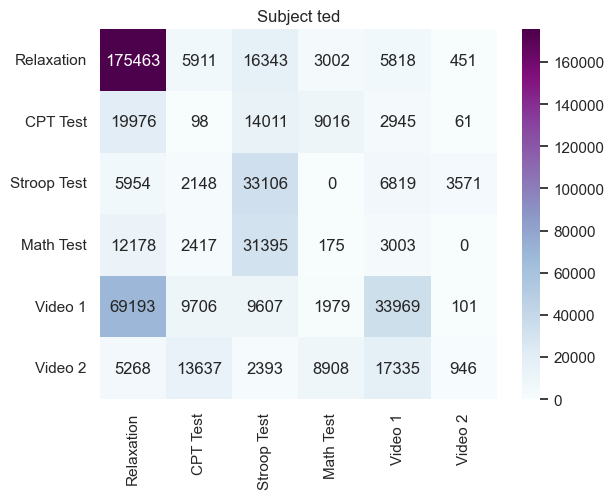

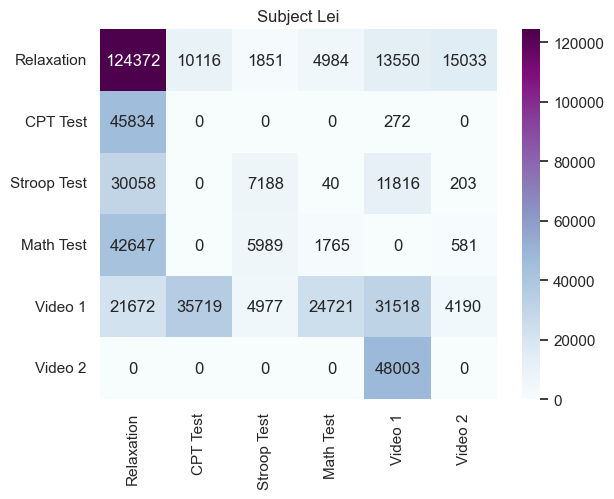

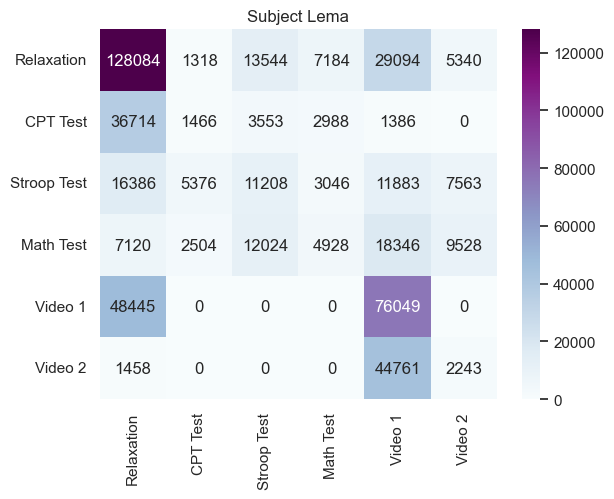

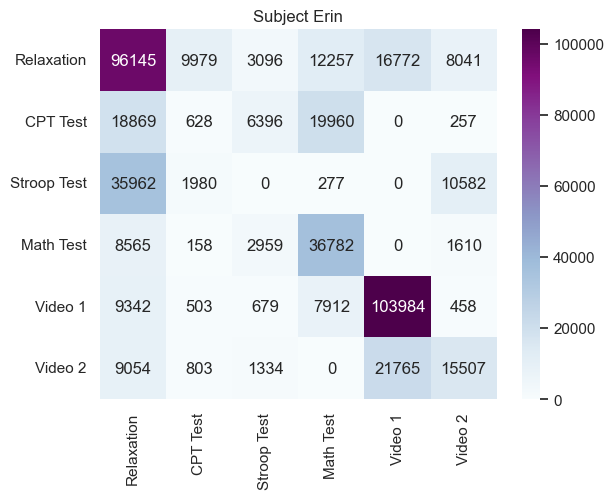

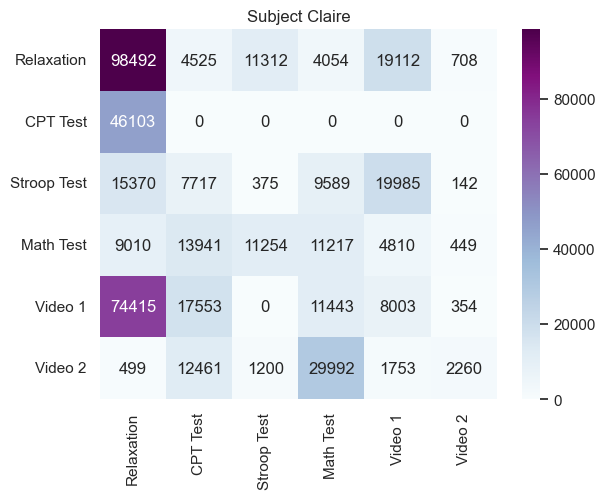

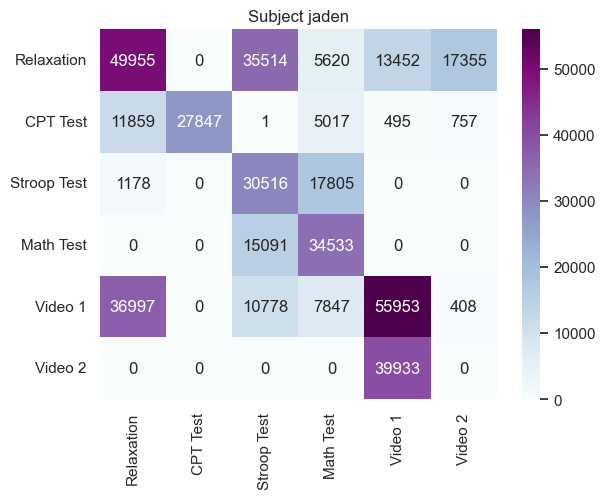

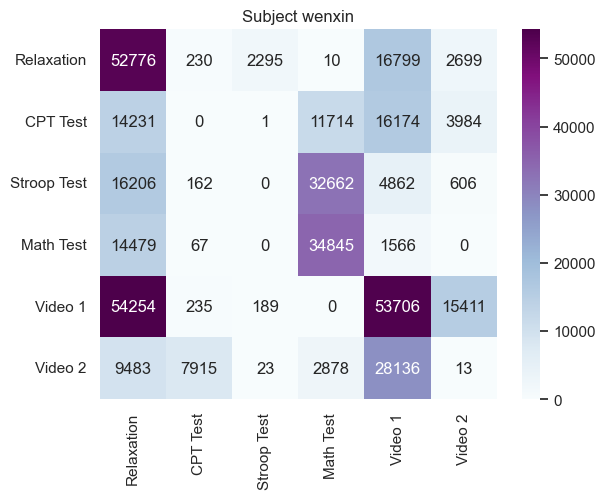

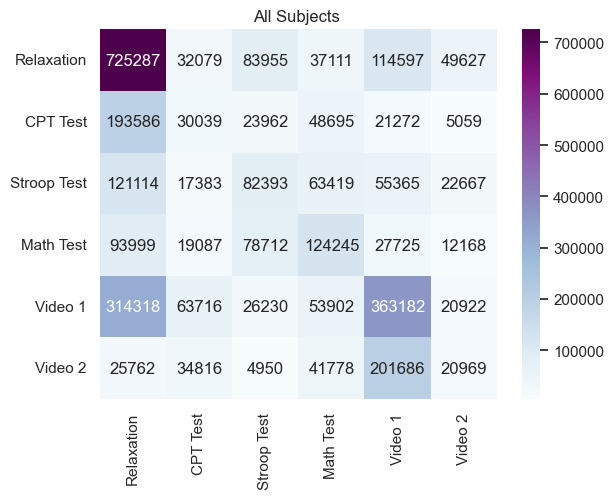

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
cm_all = np.zeros((6,6)) 
class_names = ['Relaxation','CPT Test', 'Stroop Test', 'Math Test', 'Video 1', 'Video 2']  
for name, cm in list(zip(np.array(scores_all)[:,0], cms)):
    #print("Subject ", int(sid))
    cm_all += cm
    df_cm = pd.DataFrame(cm, columns=class_names, index=class_names)
    sn.set(font_scale=1) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, cmap="BuPu",  fmt='d') # font size
    plt.title("Subject " + name)
    plt.show()
    
df_cm = pd.DataFrame(cm_all.astype(int), columns=class_names, index=class_names)
sn.set(font_scale=1) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, cmap="BuPu",  fmt='d') # font size
plt.title("All Subjects ")
plt.show()